# IMDC case study 2024

In [1]:
import src.Models3 as Models
import src.Helper2 as Helper
from src.Objects import *
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
import matplotlib.patches as mpatches
import tikzplotlib


In [2]:
time_limit = 3600

$\eta$ denotes the increases rate from pipe $p_2$ (double walled pipes) in comparison to pipe $p_1$ (single walled pipes).

In [3]:
# Constants
eta = 2
nu_homogeneous = 2
engine_room = 42

ssfp = Helper.realistic_ssfp()


In [4]:
def nu_basic(graph, edge):
    # Computes the increase rate for the second stage of an edge in the graph based on the following measure: eta.
    return nu_homogeneous

# Visualizing the instance

In [5]:
# Define which rooms are at which level
levels = {
    0: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30],
    1: [31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58],
    2: [31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67],
    3: [31, 32, 33, 34, 35, 44, 45, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75]
}

# Defining the colors:
# colors = ["#3498db", "#85c1e9", "#1f618d", "#8395a7", "#2980b9"]
colors = ['lightblue', 'yellow', 'lightgreen', 'pink', 'lightgrey']

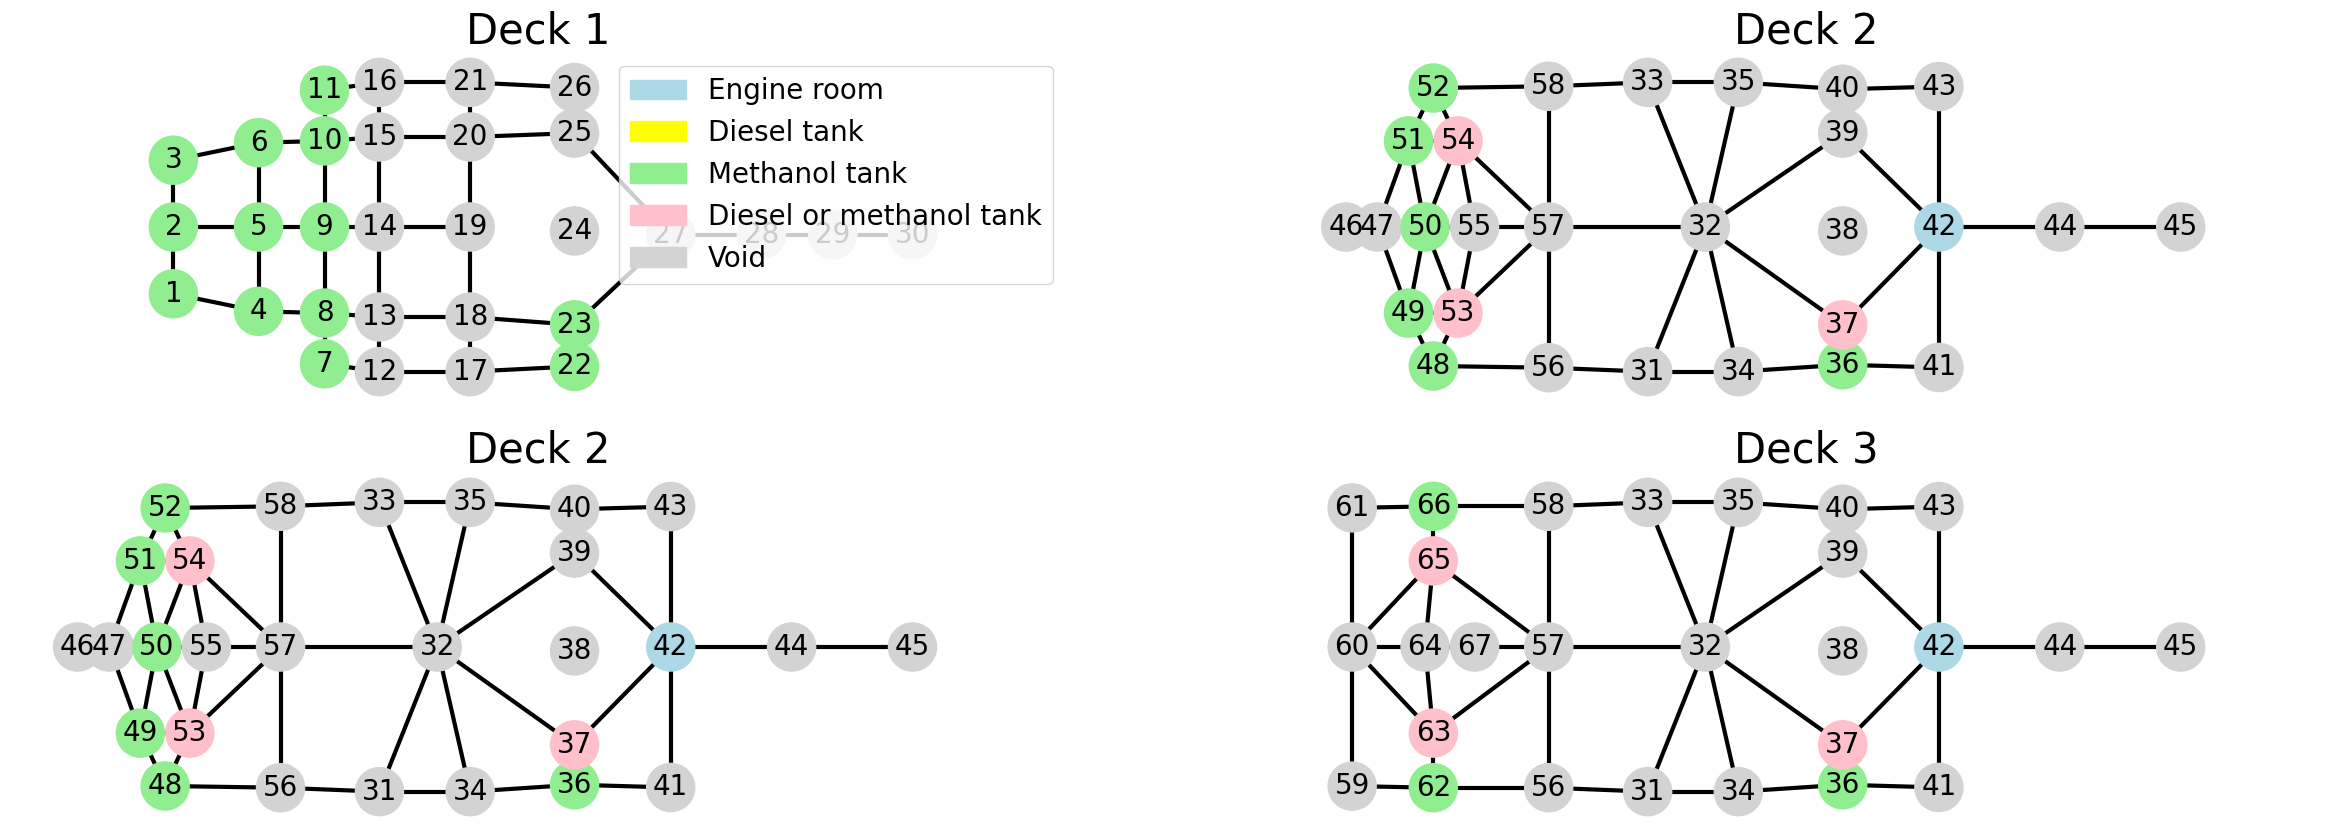

In [6]:
fig, axs = plt.subplots(2, 2, figsize=(30, 10))
for row in range(2):
    for col in range(2):
        # Get the level of the current iteration.
        level = row + col
        
        # Make the graph that corresponds to the current level.
        remove_nodes = [n for n in ssfp.graph.nodes() if n not in levels[level]]
        graph = ssfp.graph.copy()
        graph.remove_nodes_from(remove_nodes)
        
        # Set title.
        axs[row][col].set_title(f"Deck {level + 1}", fontsize=30)
        
        # Get the positions of the vertices.
        pos = dict()
        for n in graph.nodes():
            x, y, z = graph.nodes()[n]["position"]
            pos[n] = (x, y)
            
        # Get the colors of the vertices.
        node_colors = []
        for node in graph.nodes():
            if node == engine_room:
                color = colors[0]
            elif sum(node in scenario.terminal_groups[0] for scenario in ssfp.future) == 2:
                color = colors[3]
            elif node in ssfp.future[0].terminal_groups[0]:
                color = colors[1]
            elif node in ssfp.future[1].terminal_groups[0]:
                color = colors[2]
            else:
                color = colors[4]
            node_colors.append(color)
            
        # Draw the networkx-graph.
        nx.draw(graph,
                pos=pos,
                node_color=node_colors,
                edge_color="black",
                width=3,
                with_labels=True,
                node_size=1200,
                font_size=20,
                ax=axs[row][col])
        axs[row][col].set_xlim([0, 150])
    
patch1 = mpatches.Patch(color=colors[0], label='Engine room')
patch2 = mpatches.Patch(color=colors[1], label='Diesel tank')
patch3 = mpatches.Patch(color=colors[2], label='Methanol tank')
patch4 = mpatches.Patch(color=colors[3], label='Diesel or methanol tank')
patch5 = mpatches.Patch(color=colors[4], label='Void')


axs[0][0].legend(handles=[patch1, patch2, patch3, patch4, patch5], loc="upper right", fontsize=20)

plt.savefig("figures/IMDC/methanol_diesel.pdf")
plt.show()

# Coding the different options for $\nu_{uv}$

## $\nu_{uv}$ option 1

In [7]:
def manhattan_distance(vertex1, vertex2, graph):
    # Returns the manhattan distance of two vertices in a 3D graph (hence, they have an x, y, and z coordinate.
    return sum(abs(graph.nodes()[vertex1]["position"][i] - graph.nodes()[vertex2]["position"][i]) for i in range(3))

In [8]:
numerator = max(sum(manhattan_distance(vertex, engine_room, ssfp.graph) for vertex in edge) for edge in ssfp.graph.edges())

def increase_rate1(graph, edge):
    # Computes the increase rate for the second stage of an edge in the graph based on the following measure:
    # nu_{uv} = max(d(a,ER)+d(b,ER))/d(u,ER)+d(v,ER)
    denominator = sum(manhattan_distance(vertex, engine_room, ssfp.graph) for vertex in edge)
    nu = numerator / denominator
    return nu

# ssfp.set_pipe_costs(increase_rate1, 2)

## $\nu_{uv}$ option 2

In [9]:
def increase_rate2(graph, edge):
    # Computes the increase rate for the second stage of an edge in the graph based on the following measure:
    # nu_{uv} = 6 if u or v equals the engine room, 3 if u or v equals a tank, and 2 otherwise.
    
    # Constants
    diesel_tanks = set(ssfp.present.terminal_groups[0]) - set([engine_room])
    methanol_tanks = set(set(ssfp.future[1].terminal_groups[0]) - set([engine_room]))
    tanks = diesel_tanks.union(methanol_tanks)

    (u, v) = edge
    if engine_room in edge:
        return 6
    if u in tanks or v in tanks:
        return 3
    else:
        return 2

# ssfp.set_pipe_costs(increase_rate2, 2)

## Visualization of both options for $\nu_{uv}$

In [10]:
nu_list1, nu_list2 = [], []
for edge in ssfp.graph.edges():
    nu1 = increase_rate1(ssfp.graph, edge)
    nu2 = increase_rate2(ssfp.graph, edge)
    nu_list1.append(nu1)
    nu_list2.append(nu2)

/Users/berendmarkhorst/Library/Mobile Documents/com~apple~CloudDocs/PhD/READINESS/steiner4readiness/venv/lib/python3.8/site-packages/tikzplotlib/_cleanfigure.py:200: UserWarning: Cleaning Bar Container (bar plot) is not supported yet.
  warnings.warn("Cleaning Bar Container (bar plot) is not supported yet.")


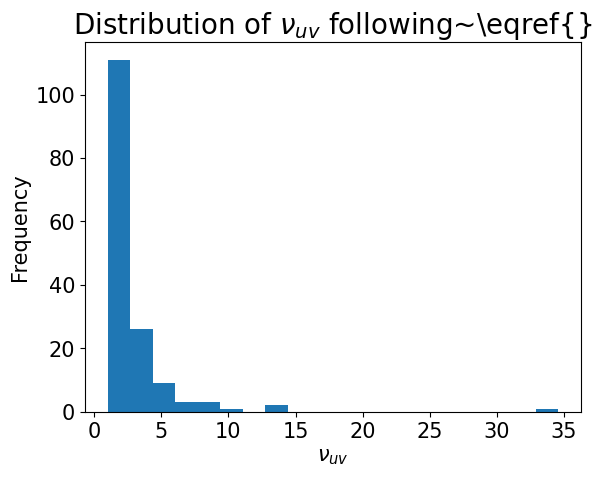

In [11]:
# This plot shows that most edges do not have a high increase rate. Only (27, 42) has a considerably high rate
# as both vertices lie close to the engine room.
plt.hist(nu_list1, bins=20);
plt.xlabel(r"$\nu_{uv}$", fontsize=15);
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel("Frequency", fontsize=15);
plt.title(r"Distribution of $\nu_{uv}$ following~\eqref{}", fontsize=20);

tikzplotlib.clean_figure();
tikzplotlib.save("figures/IMDC/nu_option1.tex")

# plt.savefig("figures/IMDC/nu_option1.pdf")

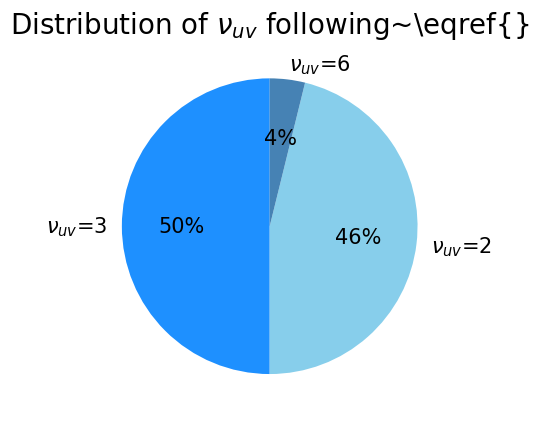

In [12]:
# This plot shows that most edges are connected to a tank, hence \nu_{uv}=3. 
# Only a few edges are adjacent to the engine room (4%).

nu_dict2 = Counter(nu_list2)

colors = ['#1E90FF', '#87CEEB', '#4682B4']

plt.pie(nu_dict2.values(), labels=[r"$\nu_{uv}$=" + str(nu) for nu in nu_dict2.keys()], textprops={'fontsize': 15}, autopct='%1.f%%', startangle=90, colors=colors);
plt.title(r"Distribution of $\nu_{uv}$ following~\eqref{}", fontsize=20);

tikzplotlib.clean_figure();
tikzplotlib.save("figures/IMDC/nu_option2.tex")
# plt.savefig("figures/IMDC/nu_option2.pdf")

# Running the Models on our Instance

In [13]:
ssfp.set_pipe_costs(eta, ssfp.all_pipes[1])
for pipe in ssfp.all_pipes:
    ssfp.set_second_stage_costs(increase_rate2, pipe)

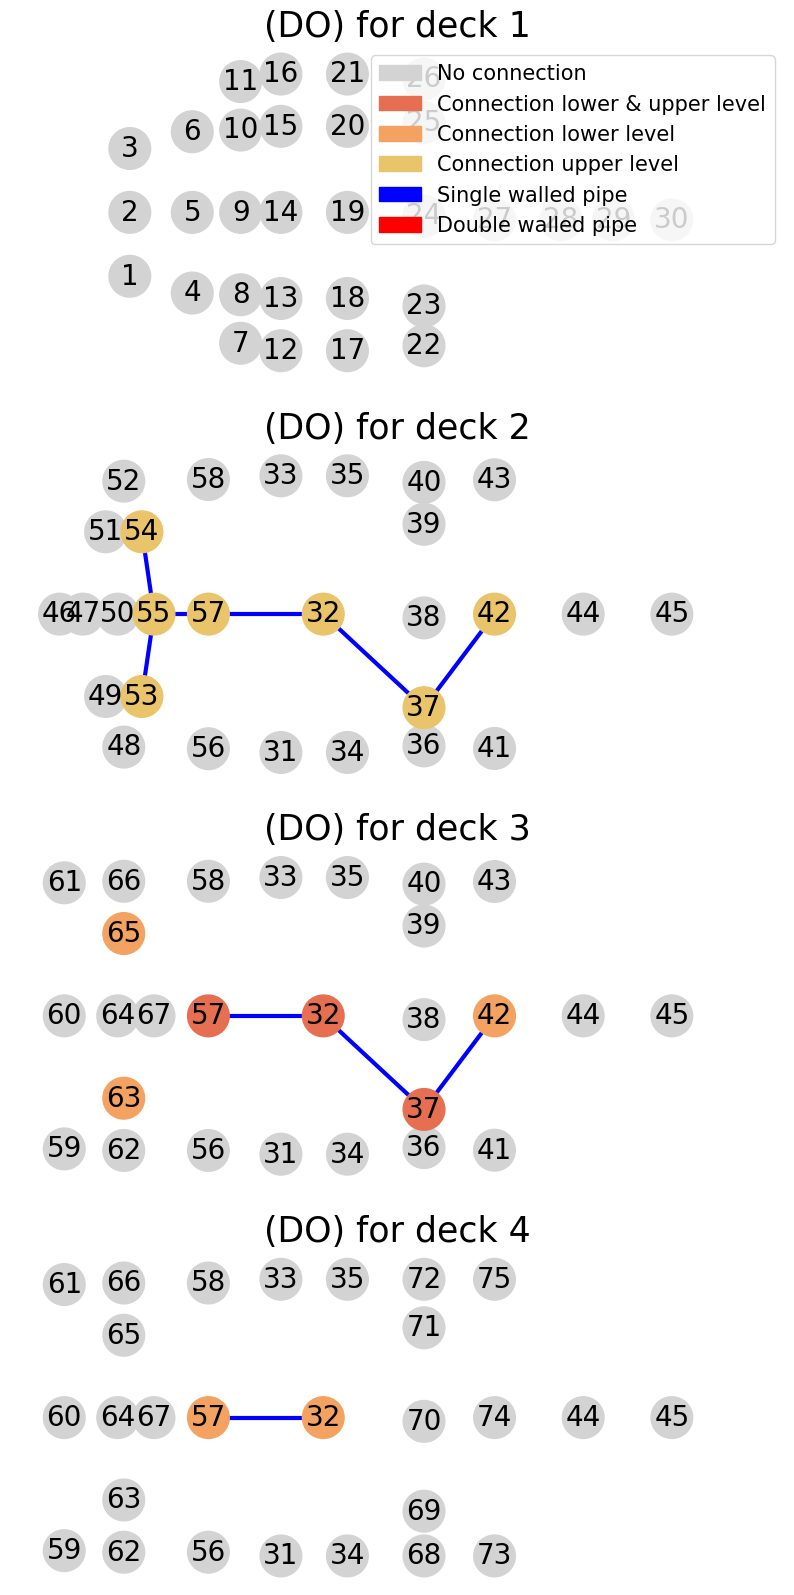

In [14]:
# Deterministic model.
deterministic_solution = Models.deterministic_directed(ssfp.present, time_limit, "notebooks/deterministic_gurobi.txt")
Helper.plot_ship(ssfp, deterministic_solution, title="(DO) for", output=None)


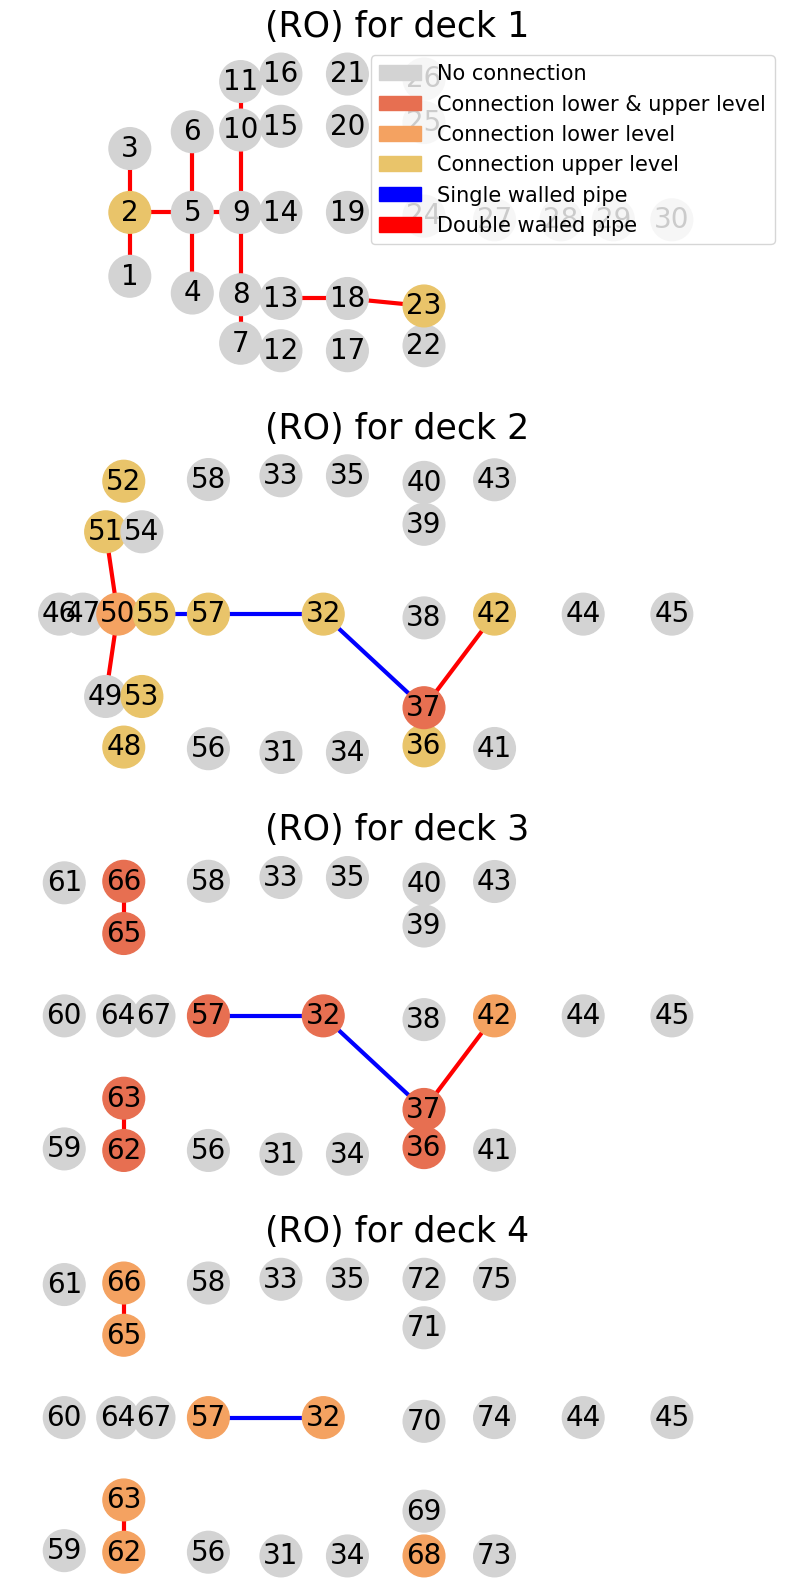

In [15]:
# Robust model
# robust_solution = Models.robust_directed(ssfp, time_limit, "notebooks/robust_gurobi.txt")
ssfp.future[0].probability = 0
ssfp.future[1].probability = 1

robust_solution = Models.stochastic_directed(ssfp, time_limit, "notebooks/stochastic_gurobi.txt")
Helper.plot_ship(ssfp, robust_solution, title="(RO) for", output=None)

# Running the models with different cost settings

## Analysis of Costs

In [16]:
def plot_costs(ssfp, title=None, output=None):
    # Robust costs
    # robust_solution = Models.robust_directed(ssfp, time_limit, "notebooks/robust_gurobi.txt")
    ssfp.future[0].probability = 0
    ssfp.future[1].probability = 1

    robust_solution = Models.stochastic_directed(ssfp, time_limit, "notebooks/stochastic_gurobi.txt")

    # Deterministic solution
    deterministic_solution = Models.deterministic_directed(ssfp.present, time_limit, "notebooks/deterministic_gurobi.txt")

    deterministic_costs = {}
    stochastic_costs = {}
    for probability1 in np.linspace(0,1,11):
        probability2 = 1-probability1
        ssfp.future[0].probability = probability1
        ssfp.future[1].probability = probability2

        # Stochastic costs
        stochastic_solution = Models.stochastic_directed(ssfp, time_limit, "notebooks/stochastic_gurobi.txt")
        stochastic_costs[probability2] = stochastic_solution.objective

        # Deterministic costs
        stochastic_solution_det = Models.stochastic_directed(ssfp, time_limit, "notebooks/stochastic_gurobi.txt", previous_result=deterministic_solution.route)
        deterministic_costs[probability2] = stochastic_solution_det.objective

    plt.plot(deterministic_costs.keys(), deterministic_costs.values(), color="black", linewidth=3, label="deterministic");
    plt.plot(stochastic_costs.keys(), stochastic_costs.values(), color="green", linewidth=3, label="stochastic");
    plt.axhline(y=robust_solution.objective, color="orange", linewidth=3, label="robust")
#     plt.legend(fontsize=15)
    plt.title(f"Expected costs for {title}", fontsize=20)
    plt.xlabel("Probability methanol", fontsize=15)
    plt.ylabel("Expected costs", fontsize=15)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    
    tikzplotlib.clean_figure();
    tikzplotlib.save(f"figures/IMDC/{output}.tex")
    
    plt.savefig(f"figures/IMDC/{output}.pdf", bbox_inches="tight")
    

In [17]:
# The average costs are not exactly the same.

def compute_costs(ssfp):
    # Compute the total costs of a graph's edges.
    costs = 0
    for pipe in ssfp.all_pipes:
        for edge in ssfp.graph.edges():
            costs += ssfp.get_first_stage_weight(edge, pipe) + ssfp.get_second_stage_weight(edge, pipe)
    return costs


## $\eta=2$, $\nu_{uv}$ option 0

In [18]:
ssfp.set_pipe_costs(eta, ssfp.all_pipes[1])
for pipe in ssfp.all_pipes:
    ssfp.set_second_stage_costs(nu_basic, pipe)

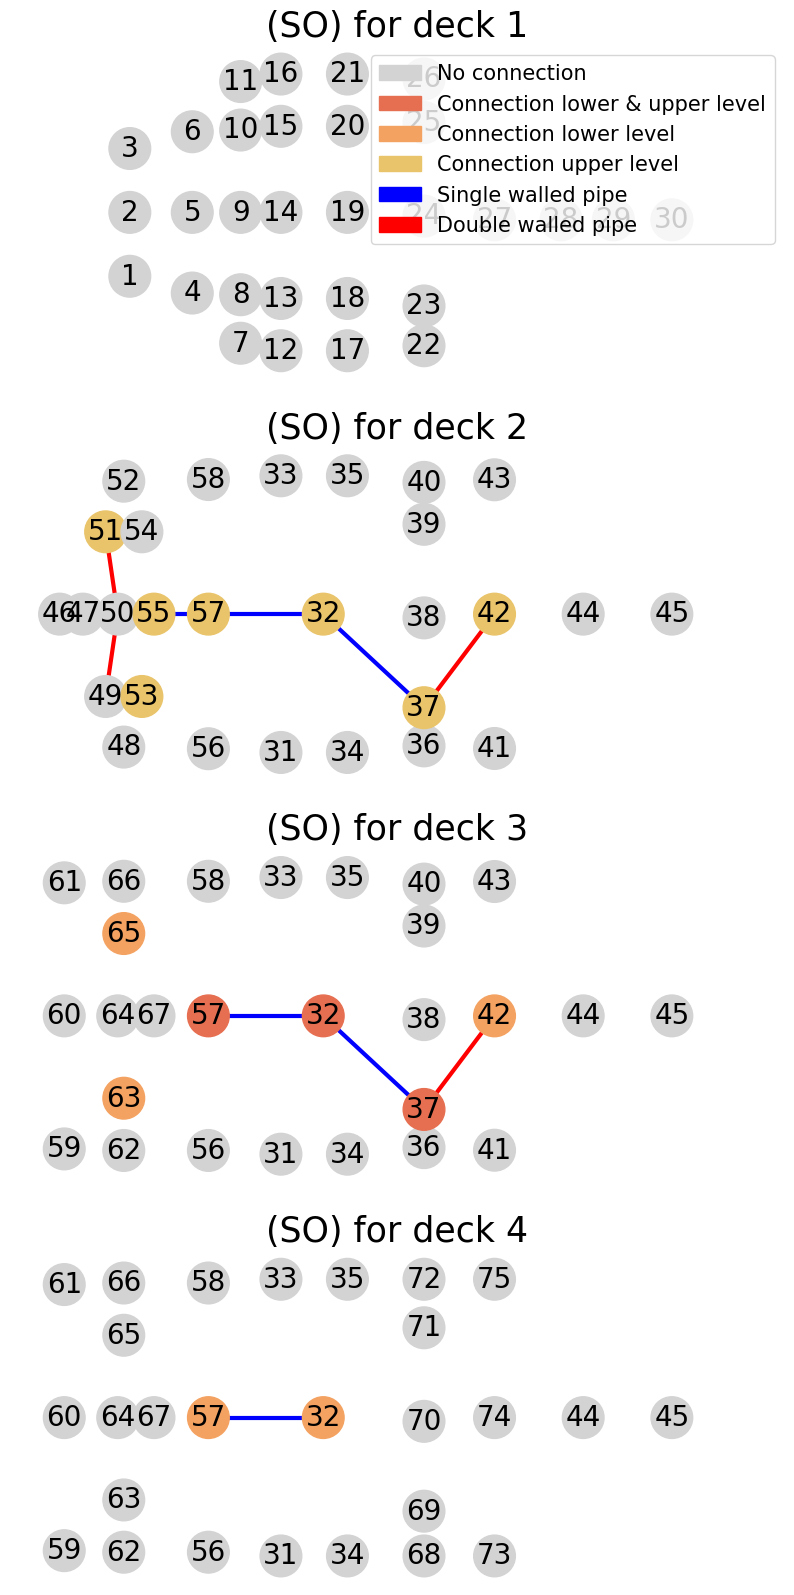

In [19]:
# Stochastic model
ssfp.future[0].probability = 0.5
ssfp.future[1].probability = 0.5

stochastic_solution = Models.stochastic_directed(ssfp, time_limit, "notebooks/stochastic_gurobi.txt")
Helper.plot_ship(ssfp, stochastic_solution, title="(SO) for", output="figures/IMDC/option0.pdf")

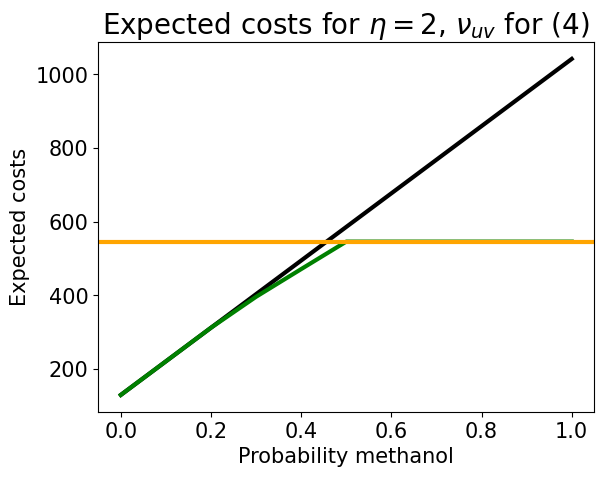

In [20]:
plot_costs(ssfp, title=r"$\eta=2$, $\nu_{uv}$ for (4)", output="costs_option0")

In [21]:
compute_costs(ssfp)

17223.254999999994

## $\eta=2$, $\nu_{uv}$ option 1

In [22]:
ssfp.set_pipe_costs(eta, ssfp.all_pipes[1])
for pipe in ssfp.all_pipes:
    ssfp.set_second_stage_costs(increase_rate1, pipe)

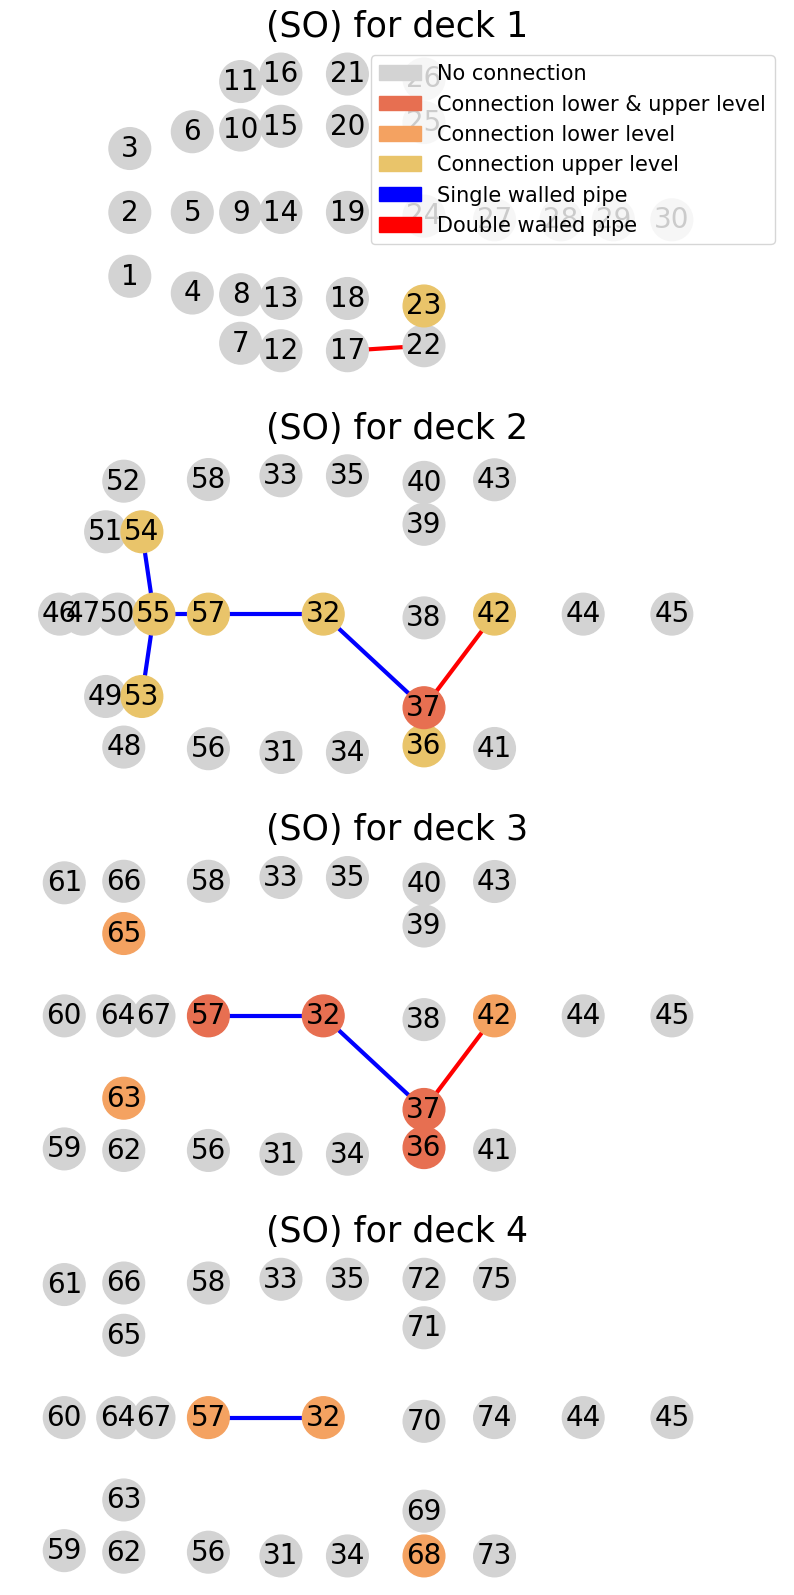

In [23]:
# Stochastic model
ssfp.future[0].probability = 0.5
ssfp.future[1].probability = 0.5

stochastic_solution = Models.stochastic_directed(ssfp, time_limit, "notebooks/stochastic_gurobi.txt")
Helper.plot_ship(ssfp, stochastic_solution, title="(SO) for", output="figures/IMDC/option1.pdf")

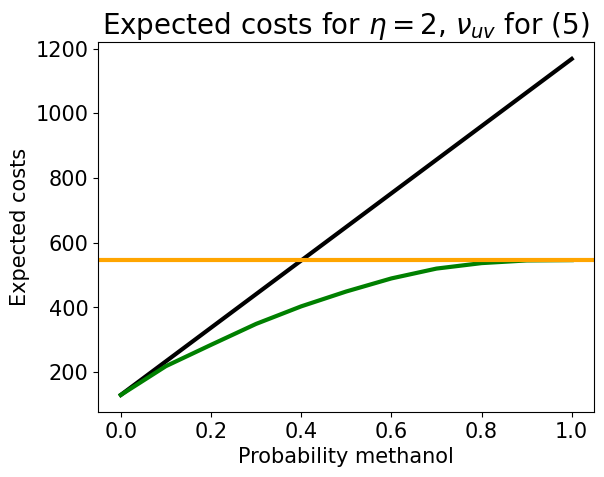

In [24]:
plot_costs(ssfp, title=r"$\eta=2$, $\nu_{uv}$ for (5)", output="costs_option1")

In [25]:
compute_costs(ssfp)

22212.472702077634

## $\eta=2$, $\nu_{uv}$ option 2

In [26]:
ssfp.set_pipe_costs(eta, ssfp.all_pipes[1])
for pipe in ssfp.all_pipes:
    ssfp.set_second_stage_costs(increase_rate2, pipe)

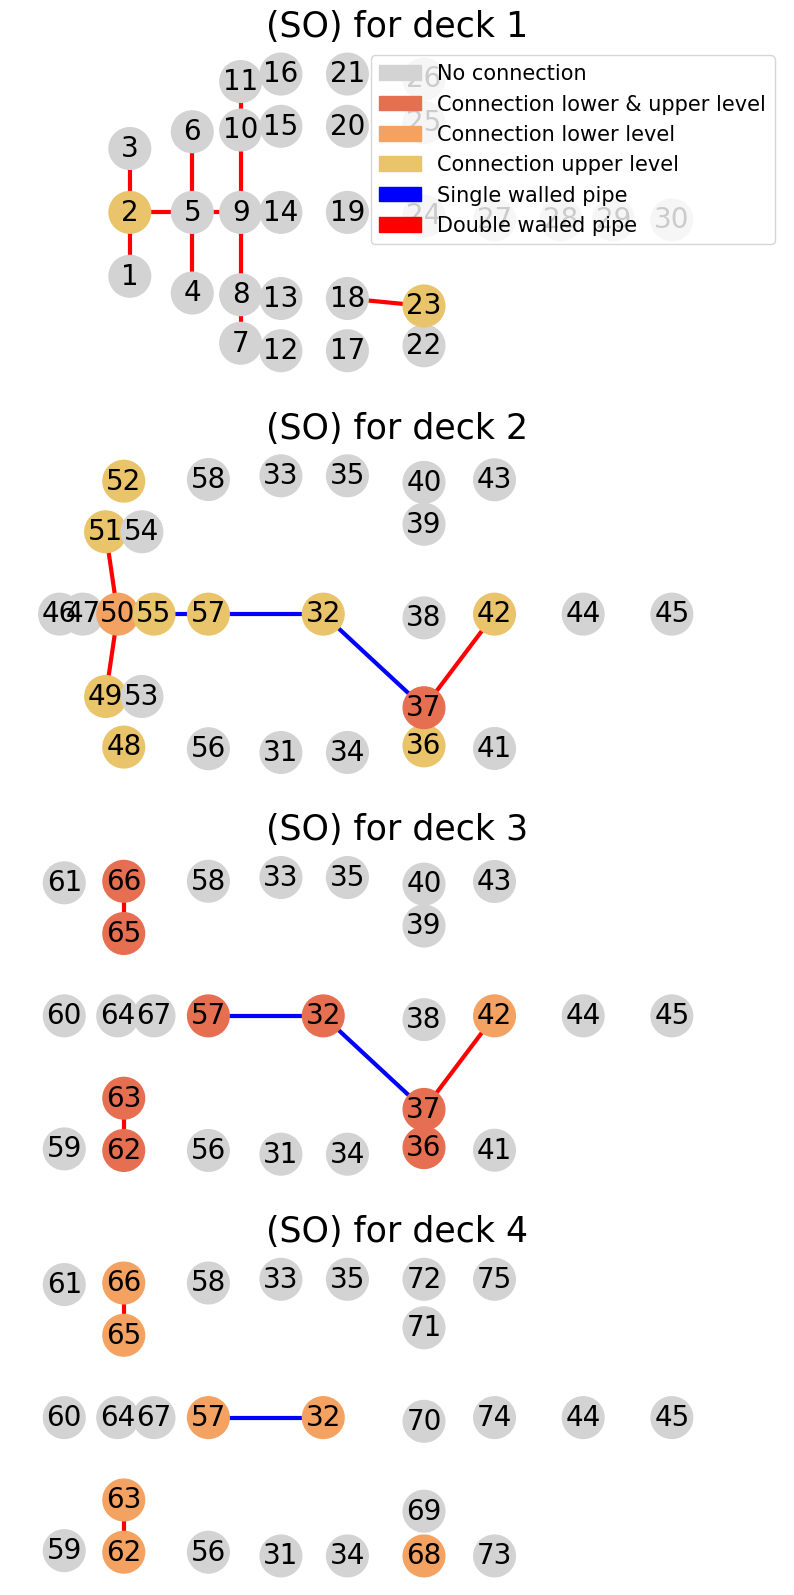

In [27]:
# Stochastic model
ssfp.future[0].probability = 0.5
ssfp.future[1].probability = 0.5

stochastic_solution = Models.stochastic_directed(ssfp, time_limit, "notebooks/stochastic_gurobi.txt")
Helper.plot_ship(ssfp, stochastic_solution, title="(SO) for", output="figures/IMDC/option2.pdf")

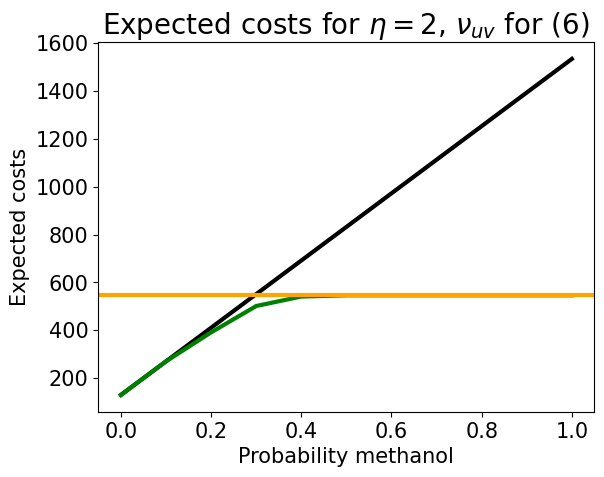

In [28]:
plot_costs(ssfp, title=r"$\eta=2$, $\nu_{uv}$ for (6)", output="costs_option2")

In [29]:
compute_costs(ssfp)

20985.57

## $\eta=4$, $\nu_{uv}$ option 0

In [30]:
eta = 4
ssfp.set_pipe_costs(eta, ssfp.all_pipes[1])
for pipe in ssfp.all_pipes:
    ssfp.set_second_stage_costs(nu_basic, pipe)

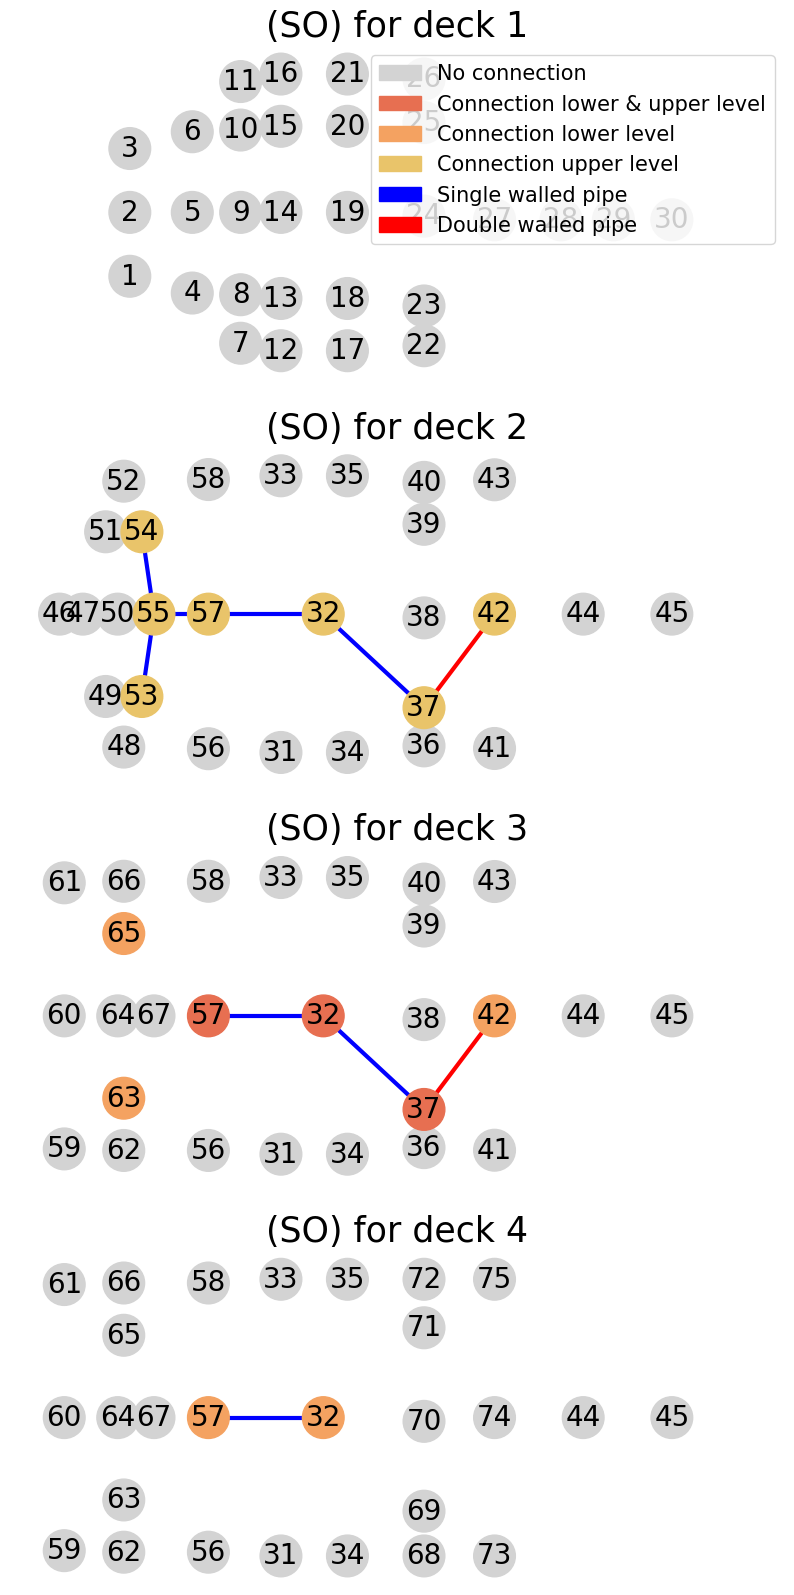

In [31]:
# Stochastic model
ssfp.future[0].probability = 0.5
ssfp.future[1].probability = 0.5

stochastic_solution = Models.stochastic_directed(ssfp, time_limit, "notebooks/stochastic_gurobi.txt")
Helper.plot_ship(ssfp, stochastic_solution, title="(SO) for", output="figures/IMDC/nu4option0.pdf")

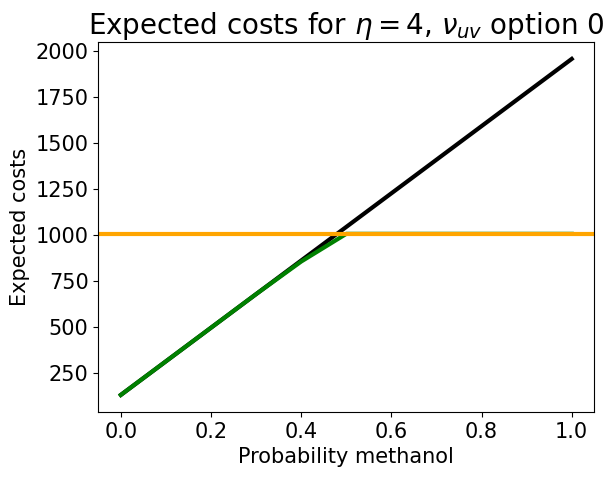

In [32]:
plot_costs(ssfp, title=r"$\eta=4$, $\nu_{uv}$ option 0", output="costs_nu4_option0")

## $\eta=4$, $\nu_{uv}$ option 1

In [33]:
eta = 4
ssfp.set_pipe_costs(eta, ssfp.all_pipes[1])
for pipe in ssfp.all_pipes:
    ssfp.set_second_stage_costs(increase_rate1, pipe)

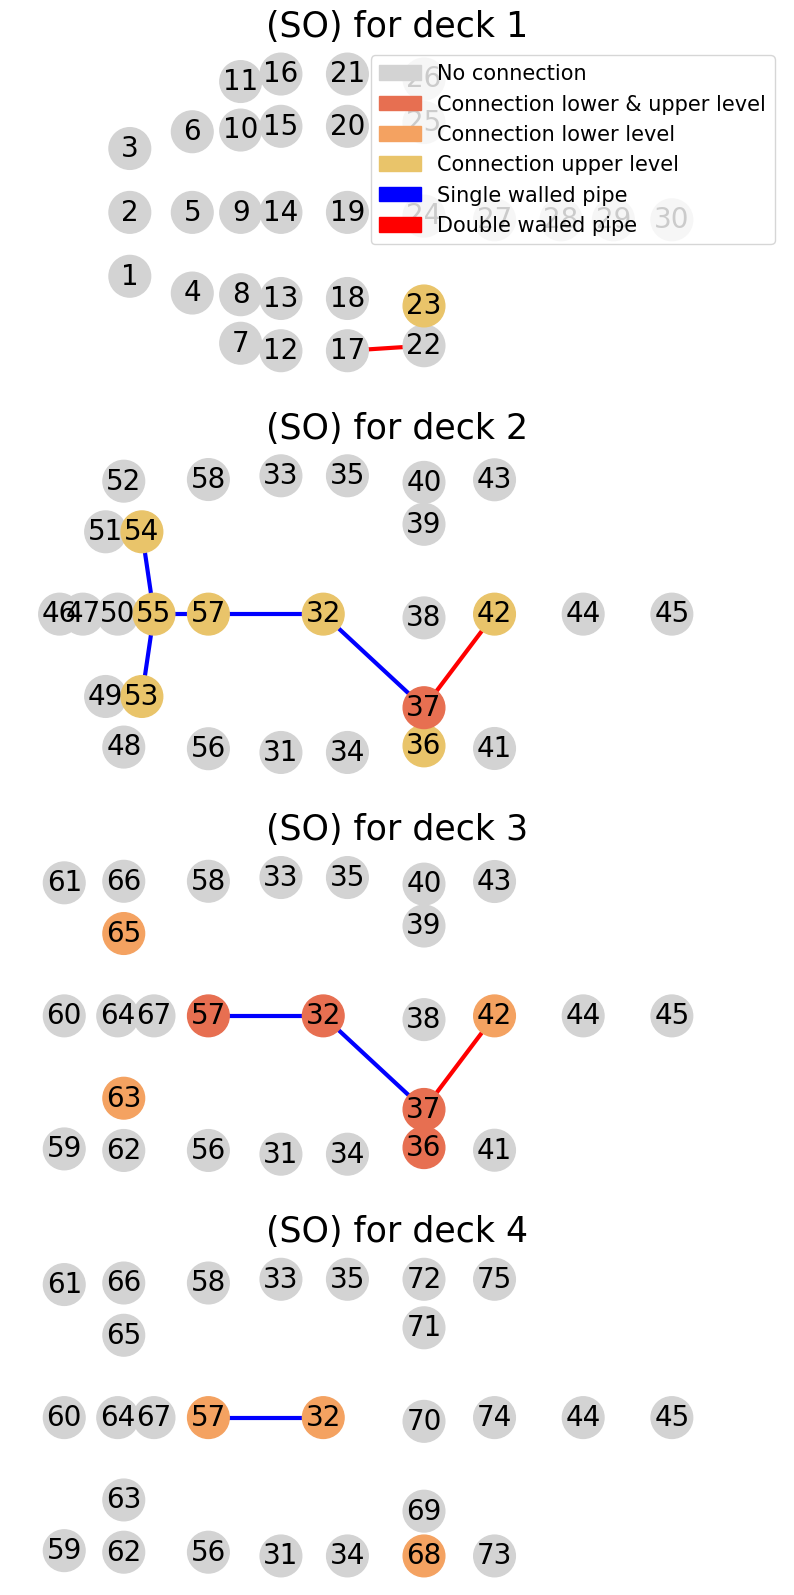

In [34]:
# Stochastic model
ssfp.future[0].probability = 0.5
ssfp.future[1].probability = 0.5

stochastic_solution = Models.stochastic_directed(ssfp, time_limit, "notebooks/stochastic_gurobi.txt")
Helper.plot_ship(ssfp, stochastic_solution, title="(SO) for", output="figures/IMDC/nu4option1.pdf")

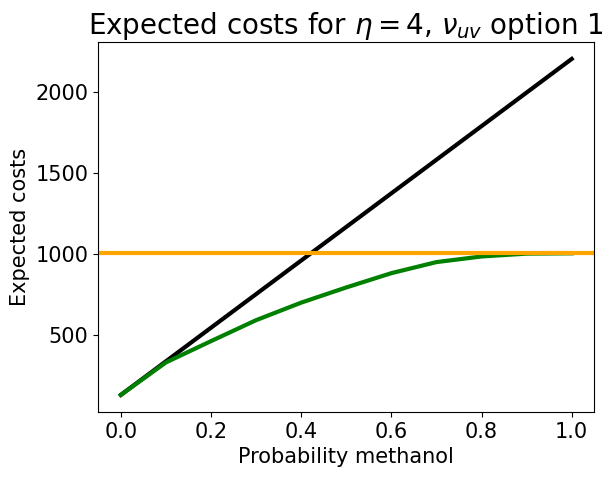

In [35]:
plot_costs(ssfp, title=r"$\eta=4$, $\nu_{uv}$ option 1", output="costs_nu4_option1")

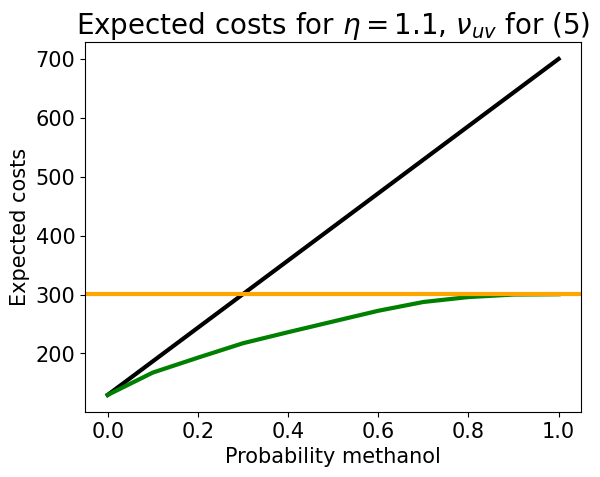

In [36]:
eta = 1.1
ssfp.set_pipe_costs(eta, ssfp.all_pipes[1])
for pipe in ssfp.all_pipes:
    ssfp.set_second_stage_costs(increase_rate1, pipe)
    
plot_costs(ssfp, title=r"$\eta=1.1$, $\nu_{uv}$ for (5)", output="costs_nu_smaller_option1")

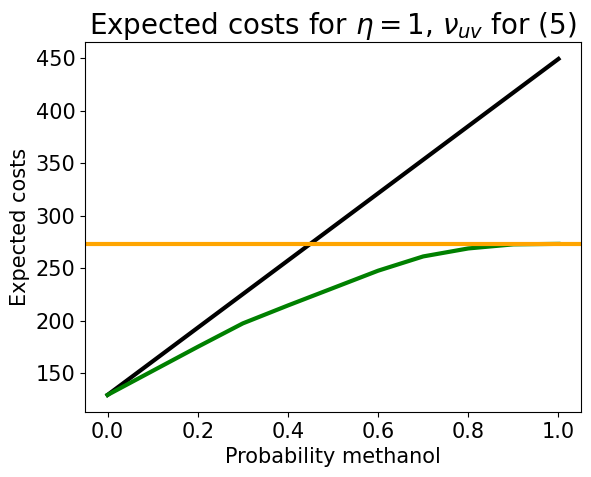

In [37]:
eta = 1
ssfp.set_pipe_costs(eta, ssfp.all_pipes[1])
for pipe in ssfp.all_pipes:
    ssfp.set_second_stage_costs(increase_rate1, pipe)
    
plot_costs(ssfp, title=r"$\eta=1$, $\nu_{uv}$ for (5)", output="costs_nu_1_option1")

## $\eta=4$, $\nu_{uv}$ option 2

In [38]:
eta = 4
ssfp.set_pipe_costs(eta, ssfp.all_pipes[1])
for pipe in ssfp.all_pipes:
    ssfp.set_second_stage_costs(increase_rate2, pipe)

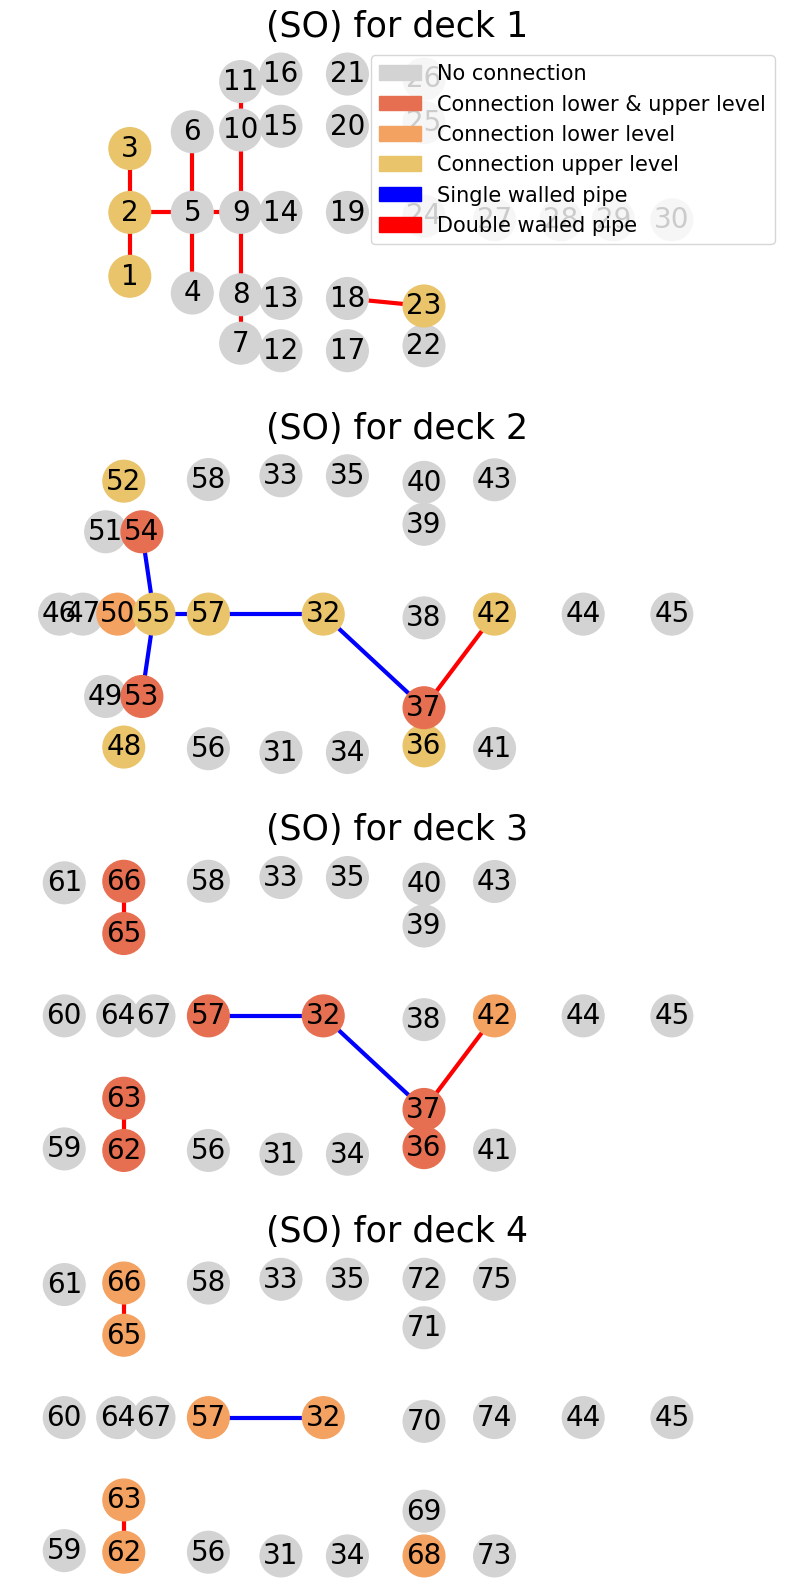

In [39]:
# Stochastic model
ssfp.future[0].probability = 0.5
ssfp.future[1].probability = 0.5

stochastic_solution = Models.stochastic_directed(ssfp, time_limit, "notebooks/stochastic_gurobi.txt")
Helper.plot_ship(ssfp, stochastic_solution, title="(SO) for", output="figures/IMDC/nu4option2.pdf")

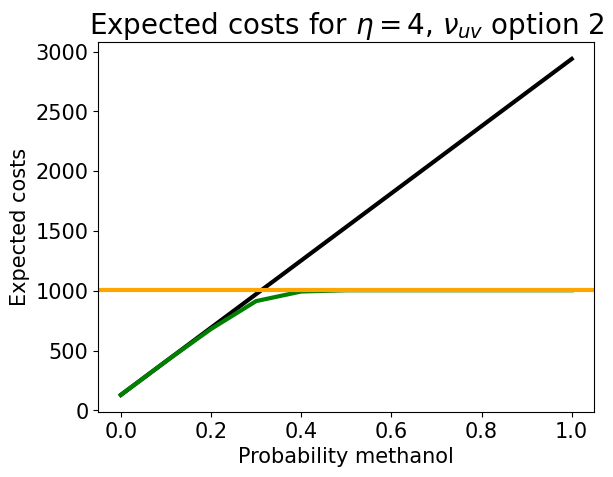

In [40]:
plot_costs(ssfp, title=r"$\eta=4$, $\nu_{uv}$ option 2", output="costs_nu4_option2")